# Detecting and examining gender bias in the MIND dataset 


The primary goal of this project is to build metrics of bias (here focusing on gender bias).

Author: <b>Jamell Dacon</b> (daconjam@msu.edu)

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline 
import nltk
from nltk.tokenize import sent_tokenize
#nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

/opt/anaconda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## News 

The news.tsv file contains the details of the information of news articles involved in the behaviors.tsv file. It has 7 columns , which are divided by tab symbols.

In [2]:
df = pd.read_csv('news.tsv', header=None, sep='\t')
df.columns = ['News_ID','Category','SubCategory','Title','Abstract','URL','Title Entities','Abstract Entities']


df['Gender'] = 'N/A'

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [3]:
df = df.drop(['News_ID','SubCategory','Title','URL','Title Entities','Abstract Entities'], axis=1)

In [4]:
female = ['goddesses', 'niece', 'baroness', 'mother', 'duchesses', 'mom', 'belle', 'belles', 'mummies', 'policewoman',
          'grandmother', 'landlady', 'landladies', 'nuns', 'stepdaughter', 'milkmaids', 'chairwomen', 'stewardesses',
          'women', 'masseuses', 'daughter-in-law', 'priestesses', 'stewardess', 'empress', 'daughter', 'queens',
          'proprietress', 'brides', 'lady', 'queen', 'matron', 'waitresses', 'mummy', 'empresses', 'madam', 
          'witches', 'sorceress', 'lass', 'milkmaid', 'granddaughter', 'grand-daughter', 'congresswomen','moms', 'manageress', 
          'princess', 'stepmothers', 'stepdaughters', 'girlfriend', 'shepherdess', 'females', 'grand-mothers', 'grandmothers'
          'step-daughter', 'nieces', 'priestess', 'wife', 'mothers', 'usherette', 'postwoman', 'hinds', 'wives', 
          'murderess', 'hostess', 'girl', 'waitress', 'spinster', 'shepherdess', 'businesswomen', 'duchess', 'madams', 'mamas',
          'nun', 'heiress', 'aunt', 'princesses', 'fiancee', 'mrs', 'ladies', 'mother-in-law', 'actress', 'actresses', 
          'postmistress', 'headmistress', 'heroines', 'bride', 'businesswoman', 'baronesses', 'sows', 'witch',
          'daughters-in-law','aunts', 'huntress', 'lasses', 'mistress', 'mistresses', 'sister', 'hostesses', 'poetess', 
          'masseuse', 'heroine', 'goddess','grandma', 'grandmas', 'maidservant', 'heiresses', 'patroness',
          'female', 'governesses', 'millionairess', 'congresswoman', 'dam', 'widow', 'granddaughters', 'grand-daughters', 'headmistresses', 
          'girls', 'she', 'policewomen', 'step-mother','stepmother', 'widows', 'abbess', 'mrs.', 'chairwoman', 'sisters',
          'mama', 'woman','daughters', 'girlfriends', 'she’s', 'her', 'maid', 'countess', 'giantess', 'poetess', 'jew',
          'mayoress', 'peeress', 'negress', 'abbess', 'traitress', 'benefactress', 'instructress', 'conductress', 'founder',
          'huntress', 'temptress', 'enchantress', 'songstress', 'murderess', 'murderesses', 'patronesses', 'authoress', 'czarina',
          'spokeswoman', 'spokeswomen', 'ma', 'councilwoman', 'council-woman', 'councilwomen', 'council-women', 'mum', 'lesbian', 'lesbians', 'breast', 'breasts'
          'maiden', 'maidens', 'sorority', 'sororities', 'saleswoman', 'dudette', 'maternal', 'feminist', 'feminists', 'sisterhood', 
          'housewife', 'housewives', 'stateswoman', 'stateswomen', 'countrywoman', 'countrywomen', 'chick', 'chicks', 'mommy',
          'strongwoman', 'strongwomen', 'babe', 'babes', 'diva', 'divas', 'feminine', 'feminism', 'gal', 'gals', 'sistren', 'schoolgirl',
          'schoolgirls', 'matriarch', 'matriarchy', 'motherhood', 'wifey', 'sis', 'femininity', 'ballerina', 'ballerinas', 'granny', 
          'grannies', 'mami', 'momma', "ma'am", 'gf', 'gfs', 'damsel', 'damsels', 'vixen', 'vixens', 'nan', 'nanny', 'nannies',
          'auntie', 'womenfolk', 'sisterly', 'motherly', 'homegirl', 'homegirls', 'grand-neice', 'grand-neices',
          'grandneice', 'grandneices', 'jane doe', 'noblewoman', 'noblewomen', 'dream girl', 'madame', 'herself', 'hers']

In [5]:
male = ['god', 'gods', 'nephew', 'nephews', 'him', 'baron', 'father', 'fathers' 'dukes', 'dad', 'beau', 'beaus', 'daddies',
        'policeman', 'policemen', 'grandfather', 'landlord', 'landlords', 'monk', 'monks', 'step-son', 'step-sons', 
        'milkmen', 'chairmen', 'chairman', 'steward', 'men', 'masseurs', 'son-in-law', 'priest', 'king', 'governor', 
        'waiter', 'daddy', 'steward', 'emperor', 'son', 'proprietor', 'groom', 'grooms', 'gentleman', 'gentlemen', 'sir', 
        'wizards', 'sorcerer', 'lad','milk-man', 'grandson', 'grand-son','congressmen','dads', 'manager', 'prince', 'stepfathers', 
        'boyfriend', 'shepherd', 'shepherds', 'males', 'grandfathers', 'grand-fathers', 'husband', 'usher', 'postman','stags', 
        'husbands', 'host', 'boy', 'waiter', 'bachelor', 'bachelors', 'businessmen', 'duke', 'sirs', 'papas', 'heir', 'uncle', 
        'princes', 'fiance', 'mr', 'count', 'lords', 'father-in-law', 'actor', 'actors', 'postmaster', 'headmaster', 'heroes',
        'businessman', 'boars','wizard', 'sons-in-law', 'fiances', 'uncles', 'hunter', 'lads', 'masters', 'brother', 
        'hosts', 'poet', 'hero', 'grandpa', 'grandpas','manservant', 'heirs', 'male', 'tutors', 'millionaire',
        'congressman', 'sire', 'sires', 'widower','grandsons', 'grand-sons','boys', 'he', 'step-father', 'jewess', 'bridegroom', 'bridegrooms'
        'stepfather', 'widowers', 'abbot', 'mr.,' 'brothers', 'man', 'sons', 'boyfriends', 'he’s', 'his', 'earl', 
        'giant', 'stepson', 'stepsons', 'poet', 'mayor', 'peer', 'negro', 'abbot', 'traitor', 'benefactor',
        'instructor', 'conductor', 'founder', 'founders', 'hunters', 'huntresses', 'tempt', 'enchanter', 'enchanters', 'songster', 
        'songsters', 'murderer', 'murderers', 'patron', 'patrons', 'author', 'czar', 'guy', 'spokesman', 'spokesmen',
        'pa', 'councilman', 'council-man', 'councilmen', 'council-men', 'gay', 'gays', 'prostate cancer', 'fraternity', 'fraternities', 'salesman', 'dude', 'dudes', 'paternal',
        'brotherhood', 'statesman', 'statesmen', 'countryman', 'countrymen', 'suitor', 'macho', 'papa', 'strongman', 'strongmen',
        'boyhood', 'manhood', 'masculine', 'macho', 'horsemen', 'brethren', 'chap','chaps', 'schoolboy', 'schoolboys', 'bloke',
        'blokes', 'patriarch', 'patriachy', 'fatherhood', 'hubby', 'hubbies', 'fella', 'fellas', 'handyman', 'fraternal', 
        'bro', 'masculinity', 'ballerino', 'pappy', 'papi', 'pappies', 'dada', 'bf', 'bfs', 'knights', 'knight', 
        'menfolk', 'brotherly', 'manly', 'pimp', 'pimps', 'homeboy', 'homeboys','grandnephew', 'grand-nephew',
        'grand-nephew', 'grand-nephews', 'john doe', 'nobleman', 'noblemen', 'dream boy', 'himself', 'gramps']

In [6]:
gender_words  = len(female) + len(male)
print('The total no. of gender words are', gender_words)
print('There are {0} male words, and {1} female words'.format(len(male), len(female)))

The total no. of gender words are 465
There are 230 male words, and 235 female words


In [7]:
len(df['Abstract'])

101527

In [8]:
df.head(10)

,Gender,Category,Abstract
0,N/A,lifestyle,"Shop the notebooks, jackets, and more that the..."
1,N/A,news,Apple's new iPad releases bring big deals on l...
2,N/A,health,These seemingly harmless habits are holding yo...
3,N/A,health,NaN
4,N/A,news,Lt. Ivan Molchanets peeked over a parapet of s...
5,N/A,health,"I felt like I was a fraud, and being an NBA wi..."
6,N/A,health,"They seem harmless, but there's a very good re..."
7,N/A,health,NaN
8,N/A,sports,Several fines came down against NFL players fo...
9,N/A,news,The easiest way to record what's happening on ...


In [9]:
df['Abstract'] = df['Abstract'].apply(str) # ensures the sentences are strings

In [10]:
df['Abstract'] = df['Abstract'].str.lower() # make the abstract lowercase 

In [11]:
len(df['Abstract'])

101527

In [12]:
df.shape

(101527, 3)

In [13]:
# Here we count the male and female gender words in each abstract and 
# determine a specific gender tag per abstract

m_dict, f_dict = {}, {}

for index, line in enumerate(df['Abstract']):
    words = line.split() 
    
    m, f = 0, 0  #counters for male and female words 
    
    for w in words:
        if w in male: #checks into list of male words 
            m += 1 
            if w in m_dict: #counts the male words in the abstracts
                m_dict[w] += 1
            else:
                m_dict[w] = 1
        
            
        elif w in female: #checks into list of female words 
            f += 1
            if w in f_dict: #counts the male words in the abstracts
                f_dict[w] += 1
            else:
                f_dict[w] = 1
            
    # Here we determine the tags of the abstracts        
    if m > f:
        df.loc[index, 'Gender'] = 'M'
        
    elif m == f:
        df.loc[index, 'Gender'] = 'Neutral'
        
    elif f > m:
        df.loc[index, 'Gender'] = 'F'


In [14]:
sorted(m_dict.items(), key=lambda x: x[1], reverse=True)

[('his', 16724),
 ('he', 13122),
 ('man', 3654),
 ('him', 2407),
 ('mayor', 945),
 ('manager', 856),
 ('host', 615),
 ('men', 606),
 ('son', 527),
 ('himself', 478),
 ('boy', 437),
 ('king', 333),
 ('father', 330),
 ('governor', 309),
 ('giant', 291),
 ('chairman', 255),
 ('husband', 242),
 ('hunter', 204),
 ('spokesman', 192),
 ('male', 192),
 ('congressman', 191),
 ('boys', 187),
 ('count', 186),
 ('prince', 183),
 ('guy', 179),
 ('author', 168),
 ('actor', 167),
 ('founder', 159),
 ('brother', 143),
 ('duke', 133),
 ('hosts', 120),
 ('dad', 100),
 ('knights', 93),
 ('councilman', 82),
 ('hero', 79),
 ('wizards', 76),
 ('businessman', 66),
 ('boyfriend', 60),
 ('masters', 60),
 ('heroes', 52),
 ('sons', 51),
 ('actors', 50),
 ('god', 50),
 ('founders', 48),
 ('grandfather', 45),
 ('hunters', 45),
 ('earl', 43),
 ('fraternity', 42),
 ('gay', 37),
 ('priest', 31),
 ('patrons', 29),
 ('knight', 28),
 ('shepherd', 27),
 ('uncle', 25),
 ('landlords', 25),
 ('businessmen', 22),
 ('nephew',

In [15]:
len(m_dict)

152

In [16]:
len(f_dict)

110

In [17]:
sorted(f_dict.items(), key=lambda x: x[1], reverse=True)

[('her', 6692),
 ('nan', 5420),
 ('she', 4573),
 ('woman', 1612),
 ('women', 610),
 ('mother', 495),
 ('girl', 448),
 ('wife', 311),
 ('daughter', 280),
 ('female', 259),
 ('girls', 240),
 ('mom', 200),
 ('breast', 177),
 ('actress', 146),
 ('sister', 139),
 ('maid', 122),
 ('spokeswoman', 121),
 ('lady', 120),
 ('herself', 115),
 ('queen', 108),
 ('girlfriend', 94),
 ('duchess', 64),
 ('queens', 62),
 ('congresswoman', 49),
 ('daughters', 48),
 ('dam', 47),
 ('princess', 45),
 ('mothers', 45),
 ('grandmother', 41),
 ('sisters', 40),
 ('widow', 29),
 ('ladies', 27),
 ('mrs.', 27),
 ('moms', 24),
 ('belle', 24),
 ('chairwoman', 20),
 ('witch', 19),
 ('grandma', 18),
 ('bride', 18),
 ('councilwoman', 17),
 ('aunt', 15),
 ('mistress', 14),
 ('motherhood', 14),
 ('housewives', 13),
 ('niece', 13),
 ('mama', 12),
 ('stepmother', 12),
 ('granddaughter', 12),
 ('stepdaughter', 10),
 ('witches', 10),
 ('mum', 10),
 ('actresses', 8),
 ('wives', 8),
 ('maternal', 7),
 ('hostess', 7),
 ('empress'

In [18]:
# Here we create sentiment columns 

df['Neg'] = int(0)
df['Neu'] = int(0)
df['Pos'] = int(0)

In [19]:
analyzer = SentimentIntensityAnalyzer()
df['Abstract'] = df['Abstract'].apply(str) # ensures the sentences are strings

for index, line in enumerate(df['Abstract']):
    # Tokenize each sentence 
    sent_text = nltk.sent_tokenize(line)
    ps,ng,ne = 0,0,0 # positive, negative and neutrals counters 
    
    # Determine the sentiment of each sentence
    for i, sentence in enumerate(sent_text):
        comp = analyzer.polarity_scores(sentence)['compound']
        
        if comp >= 0.05:
            ps +=1 
            
        elif comp > -0.05 and comp < 0.05:
            ne +=1 
            
        elif comp <= -0.05:
            ng += 1 

    # Here we determine the sentiments of the abstracts
    
    if (len(sent_text)==1):
        if (ps >= ne) and (ps > ng):
            df.loc[index, 'Pos'] = 1

        elif (ps <= ne) and (ne >= ng):
            df.loc[index, 'Neu'] = 1

        elif (ps < ng) and (ne <= ng):
            df.loc[index, 'Neg'] = 1
            
    if (ps == ng) and (len(sent_text)!=1):
        df.loc[index, 'Neu'] = 1     
        
    elif (ps >= ne) and (ps > ng):# and (len(sent_text)!=1):
        df.loc[index, 'Pos'] = 1

    elif (ps <= ne) and (ne >= ng):# and (len(sent_text)!=1):
        df.loc[index, 'Neu'] = 1

    elif (ps < ng) and (ne <= ng):# and (len(sent_text)!=1):
        df.loc[index, 'Neg'] = 1
        
    
        
df.head(20)

,Gender,Category,Abstract,Neg,Neu,Pos
0,Neutral,lifestyle,"shop the notebooks, jackets, and more that the...",0,1,0
1,Neutral,news,apple's new ipad releases bring big deals on l...,0,1,0
2,Neutral,health,these seemingly harmless habits are holding yo...,0,0,1
3,F,health,nan,0,1,0
4,M,news,lt. ivan molchanets peeked over a parapet of s...,1,0,0
5,F,health,"i felt like i was a fraud, and being an nba wi...",1,0,0
6,Neutral,health,"they seem harmless, but there's a very good re...",0,0,1
7,F,health,nan,0,1,0
8,Neutral,sports,several fines came down against nfl players fo...,1,0,0
9,Neutral,news,the easiest way to record what's happening on ...,0,0,1


In [20]:
df = df[df.Abstract != 'nan']

In [21]:
df['Gender'].value_counts()

Neutral    66535
M          22760
F           6817
Name: Gender, dtype: int64

In [22]:
df.Gender.unique()

array(['Neutral', 'M', 'F'], dtype=object)

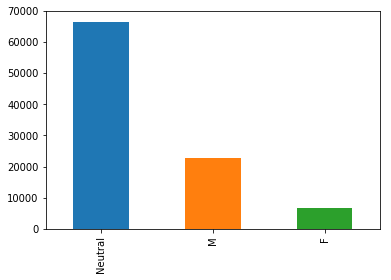

In [23]:
df['Gender'].value_counts().plot(kind='bar')

In [24]:
# Here we will count the number of news in each category for each gender
df['Count'] = 1

In [25]:
df_obs = df.groupby(['Gender', 'Category']).agg({'Count':sum})
df_obs

Count
Gender  Category            
F       autos             82
        entertainment     96
        finance          179
        foodanddrink     174
        health           400
        kids               4
        lifestyle        727
        movies           147
        music            226
        news            3030
        sports           674
        travel           220
        tv               297
        video            459
        weather          102
M       autos            278
        entertainment    102
        finance          625
        foodanddrink     327
        health           290
        kids               9
        lifestyle        577
        middleeast         1
        movies           198
        music            336
        news            8242
        northamerica       1
        sports          9297
        travel           621
        tv               284
        video           1312
        weather          260
Neutral autos           2396
        entertainment    597
        finance         4974
        foodanddrink    3818
        games              1
        health          2125
        kids              83
        lifestyle       2952
        middleeast         1
        movies           458
        music            658
        news           18093
        sports         19655
        travel          3764
        tv               710
        video           2792
        weather         3458

In [26]:
df['Category'].value_counts()

sports           29626
news             29365
finance           5778
travel            4605
video             4563
foodanddrink      4319
lifestyle         4256
weather           3820
health            2815
autos             2756
tv                1291
music             1220
movies             803
entertainment      795
kids                96
middleeast           2
northamerica         1
games                1
Name: Category, dtype: int64

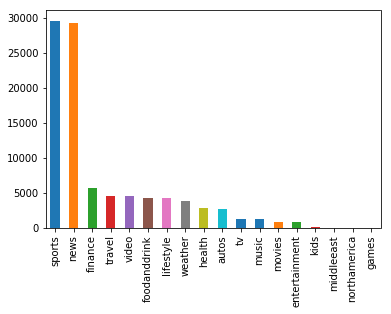

In [27]:
df['Category'].value_counts().plot(kind='bar')

In [28]:
df['Neg'] = df['Neg'].astype(float)
df['Neu'] = df['Neu'].astype(float)
df['Pos'] = df['Pos'].astype(float)

In [47]:
# Here we create gender-specific dfs

male_df = df[df['Gender'] == 'M']
female_df = df[df['Gender'] == 'F']

In [54]:
# Here we create a female df and analyze the sentiments 

mneg_avg = (male_df['Neg'].sum())/(len(male_df))
mpos_avg = (male_df['Pos'].sum())/(len(male_df))
mneu_avg = (male_df['Neu'].sum())/(len(male_df))

print((male_df['Neg'].sum()))
print((male_df['Neu'].sum()))
print((male_df['Pos'].sum()))
print(len(male_df))
print('The avg. negative sentiment for "M" is :', round(mneg_avg, 4),
      '\nThe avg. neutral sentiment for "M" is :', round(mneu_avg, 4),
      '\nThe avg. positive sentiment for "M" is :', round(mpos_avg, 4))

5958.0
9756.0
7046.0
22760
The avg. negative sentiment for "M" is : 0.2618 
The avg. neutral sentiment for "M" is : 0.4286 
The avg. positive sentiment for "M" is : 0.3096


In [53]:
# Here we create a female df and analyze the sentiments 

fneg_avg = (female_df['Neg'].sum())/(len(female_df))
fpos_avg = (female_df['Pos'].sum())/(len(female_df))
fneu_avg = (female_df['Neu'].sum())/(len(female_df))

print((female_df['Neg'].sum()))
print((female_df['Neu'].sum()))
print((female_df['Pos'].sum()))
print(len(female_df))
print('The avg. negative sentiment for "F" is :', round(fneg_avg, 4),
      '\nThe avg. neutral sentiment for "F" is :', round(fneu_avg, 4),
      '\nThe avg. positive sentiment for "F" is :', round(fpos_avg, 4))

1899.0
2902.0
2016.0
6817
The avg. negative sentiment for "F" is : 0.2786 
The avg. neutral sentiment for "F" is : 0.4257 
The avg. positive sentiment for "F" is : 0.2957


In [56]:
fneg_obs = female_df.groupby(['Gender', 'Category']).agg({'Neg':sum})
fneg_obs

Neg
Gender Category             
F      autos            46.0
       entertainment    20.0
       finance          40.0
       foodanddrink     12.0
       health          134.0
       kids              0.0
       lifestyle        94.0
       movies           33.0
       music            36.0
       news           1145.0
       sports           98.0
       travel           42.0
       tv               67.0
       video           107.0
       weather          25.0

In [57]:
mneg_obs = male_df.groupby(['Gender', 'Category']).agg({'Neg':sum})
mneg_obs

Neg
Gender Category             
M      autos           125.0
       entertainment    21.0
       finance         131.0
       foodanddrink     25.0
       health           70.0
       kids              1.0
       lifestyle        95.0
       middleeast        1.0
       movies           28.0
       music            44.0
       news           3227.0
       northamerica      0.0
       sports         1662.0
       travel          114.0
       tv               59.0
       video           278.0
       weather          77.0

In [58]:
fpos_obs = female_df.groupby(['Gender', 'Category']).agg({'Pos':sum})
fpos_obs

Pos
Gender Category            
F      autos            9.0
       entertainment   43.0
       finance         50.0
       foodanddrink    71.0
       health         117.0
       kids             2.0
       lifestyle      323.0
       movies          51.0
       music          117.0
       news           571.0
       sports         300.0
       travel          69.0
       tv             103.0
       video          161.0
       weather         29.0

In [59]:
mpos_obs = male_df.groupby(['Gender', 'Category']).agg({'Pos':sum})
mpos_obs

Pos
Gender Category             
M      autos            46.0
       entertainment    44.0
       finance         223.0
       foodanddrink    150.0
       health           90.0
       kids              6.0
       lifestyle       208.0
       middleeast        0.0
       movies           81.0
       music           146.0
       news           1679.0
       northamerica      0.0
       sports         3552.0
       travel          201.0
       tv               96.0
       video           471.0
       weather          53.0

In [55]:
df.to_csv('MIND.csv')